In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore",category = DeprecationWarning)

In [3]:
import platform
print('python version: ',platform.python_version())

python version:  3.8.3


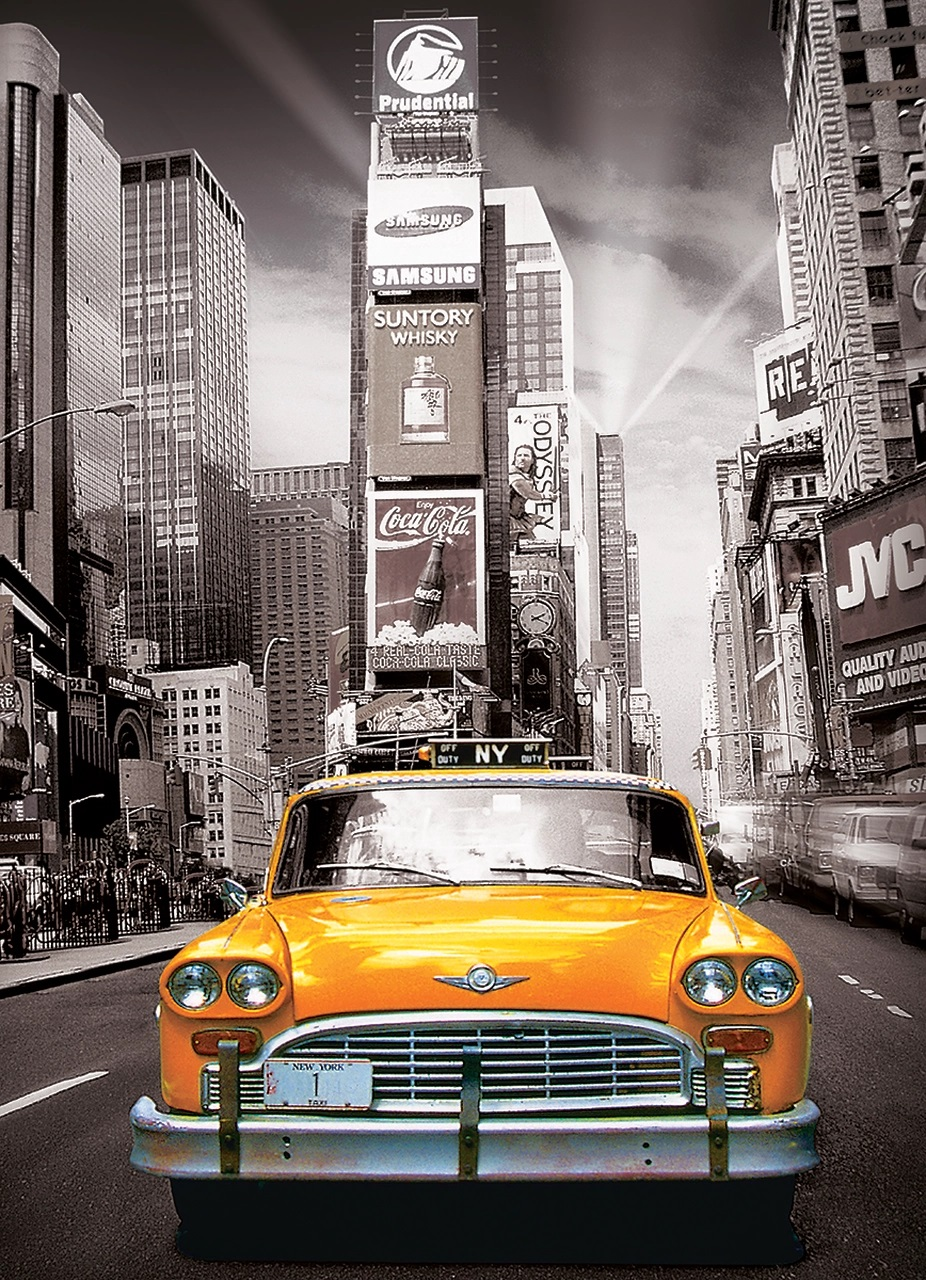

In [4]:
Image(filename="C:\Data Incubator\Project\one.jpg") #Image source: https://www.seriouspuzzles.com/new-york-city-yellow-cab-1000pc-jigsaw-puzzle-by-eurographics/

## Getting to know the dimensions of the data.

In [6]:
# Read data into pandas data frame
df_raw = pd.read_csv("C:\Data Incubator\Project\yellow_tripdata_2019-01.csv",low_memory=False) 

In [7]:
df_raw.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [8]:
# The function to display data
# It restricts the the number of rows and columns explicitly dsiplayed
def display_info(df):
    with pd.option_context("display.max_rows", 6, "display.max_columns", 7): 
        display(df)

In [9]:
display_info(df_raw.head())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,...,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,...,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,...,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,...,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,...,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,...,0.3,55.55,NaN


In [10]:
display_info(df_raw.tail())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,...,improvement_surcharge,total_amount,congestion_surcharge
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,...,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,...,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,...,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,...,0.0,0.00,0.0
7667791,2,2019-01-31 23:12:49,2019-01-31 23:14:08,...,0.0,0.00,0.0


In [11]:
# Display column names
df_raw.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [12]:
# Display column types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 1.0+ GB


In [13]:
# There are many ways to retrieve the dimensions of a data frame.
# We could try to find the fastest way of finding the dimensions of a data frame.
print('Row count: ',df_raw.shape[0])
print('Column count: ',df_raw.shape[1])


Row count:  7667792
Column count:  18


In [14]:
%timeit df_raw.shape

610 ns ± 63.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [15]:
# alternate way of retrieving dimensions of a data frame.
print('Row count: ',len(df_raw.axes[0]))
print('Column count: ',len(df_raw.axes[1]))

Row count:  7667792
Column count:  18


In [16]:
%timeit len(df_raw.index)

269 ns ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Let us do an descriptive analysis of 'Trip Distance' named as 'trip_distance'

In [17]:
display_info(df_raw.trip_distance.head())

0    1.5
1    2.6
2    0.0
3    0.0
4    0.0
Name: trip_distance, dtype: float64

In [18]:
display_info(df_raw.trip_distance.tail())

7667787    4.79
7667788    0.00
7667789    0.00
7667790    0.00
7667791    0.00
Name: trip_distance, dtype: float64

In [19]:
df_raw.trip_distance.describe()

count    7.667792e+06
mean     2.801084e+00
std      3.737529e+00
min      0.000000e+00
25%      9.000000e-01
50%      1.530000e+00
75%      2.800000e+00
max      8.318000e+02
Name: trip_distance, dtype: float64

In [20]:
print('Minimum trip distance: ',df_raw.trip_distance.min())
print('Maximum trip distance: ', df_raw.trip_distance.max())

Minimum trip distance:  0.0
Maximum trip distance:  831.8


In [21]:
trip_distance_value_counts = df_raw.trip_distance.value_counts()
trip_distance_value_counts.head()

0.8    169442
0.9    166740
0.7    163490
1.0    162425
1.1    151862
Name: trip_distance, dtype: int64

In [22]:
trip_distance_value_counts.tail()

34.69    1
31.24    1
36.47    1
33.44    1
35.83    1
Name: trip_distance, dtype: int64

In [23]:
trip_distance_value_counts[831.8]

1

In [24]:
trip_distance_value_counts[0.7]

163490

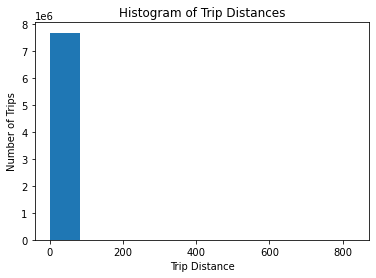

In [25]:
_ = plt.hist(df_raw.trip_distance)
_ = plt.title('Histogram of Trip Distances')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

The mean of the *trip_distance* is 2.801084 and the 75th quartile is 2.800000. This means the distribution is positively skewed. Therefore let us make an histogram of trips less than 10.0.

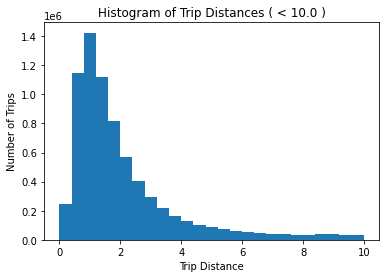

In [26]:
_ = plt.hist(df_raw['trip_distance'][df_raw['trip_distance']<10.0],bins = 25)
_ = plt.title('Histogram of Trip Distances ( < 10.0 )')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

We see that the trip distance is positively skewed or right skewed.

Following is a closer look at the trip distance data beween distance 0.5 to 1.5.

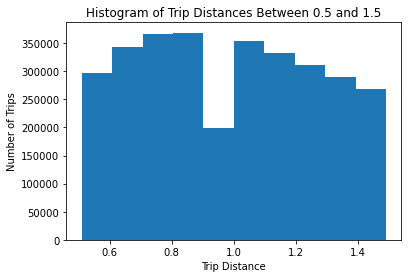

In [27]:
_ = plt.hist( df_raw['trip_distance'][(df_raw['trip_distance']<1.5) & (df_raw['trip_distance']>0.5)] ,bins = 10)
_ = plt.title('Histogram of Trip Distances Between 0.5 and 1.5')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

## Analysis of trip distance grouped by the hour of the day.

In [28]:
df_WPUH = df_raw[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance']]
display_info(df_WPUH)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0
...,...,...,...,...
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,0.0
7667791,2,2019-01-31 23:12:49,2019-01-31 23:14:08,0.0


In [29]:
df_WPUH.loc[:,'tpep_pickup_datetime'] =  pd.to_datetime(df_WPUH['tpep_pickup_datetime'])
df_WPUH.loc[:,'tpep_dropoff_datetime'] =  pd.to_datetime(df_WPUH['tpep_dropoff_datetime'])
df_WPUH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 4 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   trip_distance          float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 234.0 MB


C:\Users\neran\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [30]:
df_WPUH.loc[:,'PU_hour'] = df_WPUH['tpep_pickup_datetime'].dt.hour

C:\Users\neran\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [31]:
df_WPUH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667792 entries, 0 to 7667791
Data columns (total 5 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   trip_distance          float64       
 4   PU_hour                int64         
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 292.5 MB


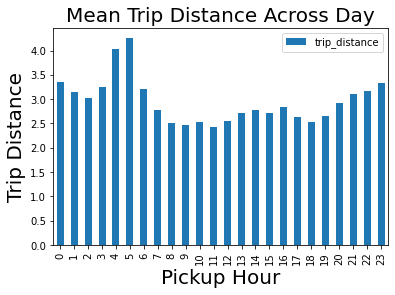

In [32]:
_ = df_WPUH[['trip_distance','PU_hour']].groupby('PU_hour').mean().plot.bar()
_ = plt.title('Mean Trip Distance Across Day', fontsize = 20)
_ = plt.xlabel('Pickup Hour', fontsize = 20)
_ = plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

**The mean Trip Distance is higher during 4th and 5th hours**

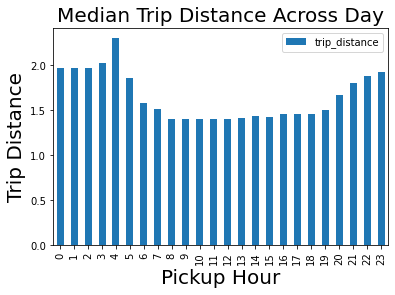

In [33]:
_ = df_WPUH[['trip_distance','PU_hour']].groupby('PU_hour').median().plot.bar()
_ = plt.title('Median Trip Distance Across Day', fontsize = 20)
_ = plt.xlabel('Pickup Hour', fontsize = 20)
_ = plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

**The median Trip Distance is higher during 4th hour.**

**Now we will try to mean distance during the day of the week**

In [34]:
df_WPUH.loc[:,'day_of_week'] = df_WPUH['tpep_pickup_datetime'].dt.dayofweek
display_info(df_WPUH)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PU_hour,day_of_week
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.5,0,1
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,2.6,0,1
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,0.0,13,4
...,...,...,...,...,...,...
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,0.0,23,3
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,0.0,23,3
7667791,2,2019-01-31 23:12:49,2019-01-31 23:14:08,0.0,23,3


In [35]:
df_WPUH.day_of_week.unique()

array([1, 4, 2, 0, 6, 3, 5], dtype=int64)

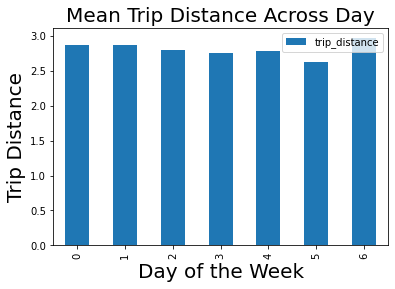

In [36]:
_ = df_WPUH[['trip_distance','day_of_week']].groupby('day_of_week').mean().plot.bar()
_ = plt.title('Mean Trip Distance Across Day', fontsize = 20)
_ = plt.xlabel('Day of the Week', fontsize = 20)
_ = plt.ylabel('Trip Distance', fontsize = 20)
plt.show()

**There is minimum correlation between the day of the week and the trip distance.**

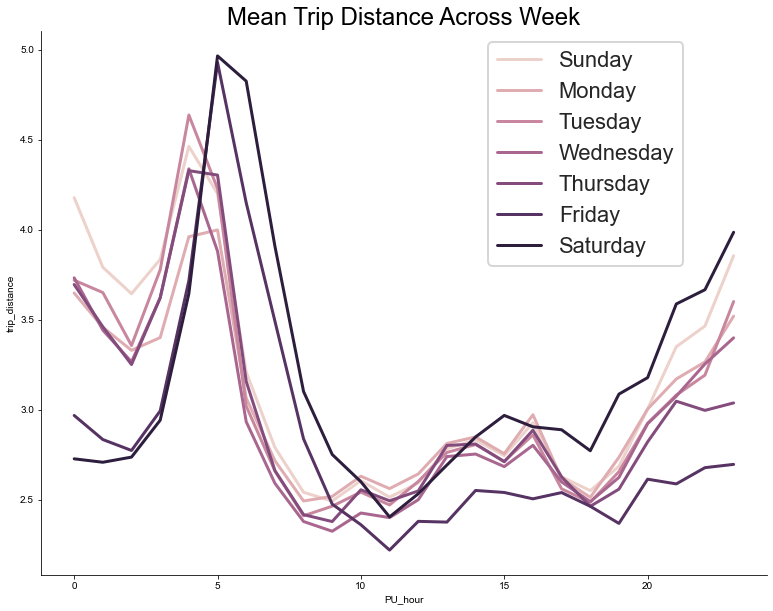

In [37]:
# Further analysis of trip distance on the day of the week
df_summary_DnTD = pd.DataFrame(df_WPUH.groupby(['day_of_week','PU_hour'])['trip_distance'].mean()) #Day and Trip Distance
df_summary_DnTD.reset_index(inplace = True)
df_summary_DnTD['unit']=1
a4_dims = (13, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.lineplot(data=df_summary_DnTD, x='PU_hour', y='trip_distance', hue='day_of_week', ax= ax)
sns.despine(bottom = False)
_ = plt.title('Mean Trip Distance Across Week')
plt.legend(labels=['Sunday','Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],loc='upper right', bbox_to_anchor=(0.9,1))
plt.show()

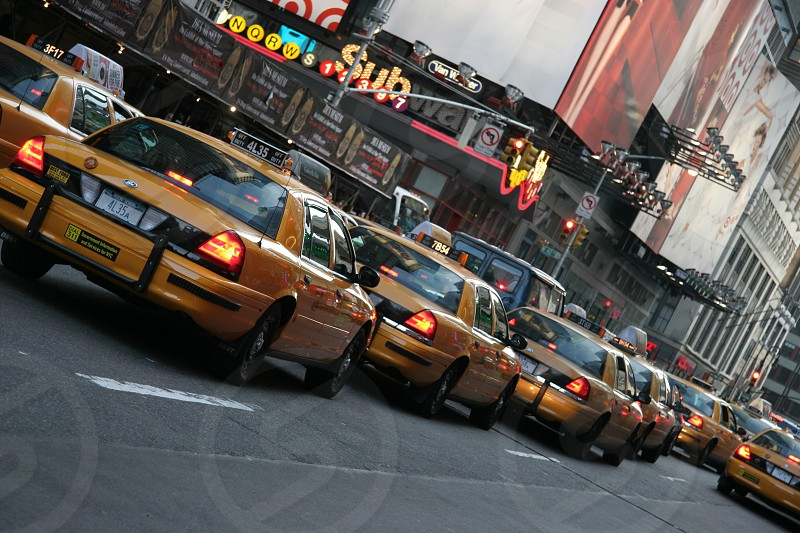

In [6]:
Image(filename="C:\Data Incubator\Project\data.jpg") #Image source: https://community.snapwire.co/photo/detail/5400bd5d542225ed1de53a24

**Let's try to get an idea of trips that start or finish from NYC area airports. Those are JFK, LAG, EWR**

In [38]:
df_zone_lookup = pd.read_csv("C:\Data Incubator\Project\zone_lookup.csv") 
df_zone_lookup.set_index('LocationID', inplace = True)

In [39]:
df_zone_lookup.head()

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


In [40]:
locationID_EWR = int(df_zone_lookup[df_zone_lookup['Zone'] == 'Newark Airport'].index.to_numpy()[0]) #take the locationID of airports
locationID_JFK = int(df_zone_lookup[df_zone_lookup['Zone'] == 'JFK Airport'].index.to_numpy()[0])
locationID_LAG = int(df_zone_lookup[df_zone_lookup['Zone'] == 'LaGuardia Airport'].index.to_numpy()[0])
print(locationID_EWR)
print(locationID_JFK)
print(locationID_LAG)

1
132
138


## Analysis of picking up from airports

In [41]:
df_AirPU = df_raw[(df_raw.PULocationID == locationID_EWR) | (df_raw.PULocationID == locationID_JFK) | (df_raw.PULocationID ==locationID_LAG)]
df_AirPU.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
23,1,2019-01-01 00:19:55,2019-01-01 00:57:56,1,12.30,1,N,138,50,1,38.0,0.5,0.5,4.00,5.76,0.3,49.06,NaN
33,2,2019-01-01 00:08:20,2019-01-01 00:41:51,2,19.13,2,N,132,238,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,NaN
68,2,2019-01-01 00:35:25,2019-01-01 01:14:21,1,18.15,2,N,132,224,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,NaN
70,1,2019-01-01 00:04:06,2019-01-01 00:38:55,4,18.10,2,N,132,224,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,NaN
112,2,2018-12-31 17:22:55,2019-01-01 16:57:23,1,22.59,1,N,132,181,1,60.0,0.5,0.5,7.00,0.00,0.3,68.30,NaN


In [42]:
df_AirPU.PULocationID.unique()

array([138, 132,   1], dtype=int64)

**We extract the required columns**

In [43]:
df_AirPU_trnc = df_AirPU[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','fare_amount','tip_amount']]
df_AirPU_trnc.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount
23,2019-01-01 00:19:55,2019-01-01 00:57:56,12.30,38.0,4.00
33,2019-01-01 00:08:20,2019-01-01 00:41:51,19.13,52.0,11.71
68,2019-01-01 00:35:25,2019-01-01 01:14:21,18.15,52.0,11.71
70,2019-01-01 00:04:06,2019-01-01 00:38:55,18.10,52.0,5.00
112,2018-12-31 17:22:55,2019-01-01 16:57:23,22.59,60.0,7.00


In [44]:
df_AirPU_trnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381392 entries, 23 to 7667763
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   tpep_pickup_datetime   381392 non-null  object 
 1   tpep_dropoff_datetime  381392 non-null  object 
 2   trip_distance          381392 non-null  float64
 3   fare_amount            381392 non-null  float64
 4   tip_amount             381392 non-null  float64
dtypes: float64(3), object(2)
memory usage: 17.5+ MB


In [45]:
df_AirPU_trnc.loc[:,'tpep_pickup_datetime'] =  pd.to_datetime(df_AirPU_trnc['tpep_pickup_datetime'])
df_AirPU_trnc.loc[:,'tpep_dropoff_datetime'] =  pd.to_datetime(df_AirPU_trnc['tpep_dropoff_datetime'])
df_AirPU_trnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381392 entries, 23 to 7667763
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   381392 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  381392 non-null  datetime64[ns]
 2   trip_distance          381392 non-null  float64       
 3   fare_amount            381392 non-null  float64       
 4   tip_amount             381392 non-null  float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 17.5 MB


C:\Users\neran\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
trip_time = df_AirPU_trnc['tpep_dropoff_datetime'] - df_AirPU_trnc['tpep_pickup_datetime']
df_AirPU_trnc['trip_time']=trip_time.dt.total_seconds()
df_AirPU_trnc.head()

<ipython-input-46-3c3b5c662f3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AirPU_trnc['trip_time']=trip_time.dt.total_seconds()


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,trip_time
23,2019-01-01 00:19:55,2019-01-01 00:57:56,12.30,38.0,4.00,2281.0
33,2019-01-01 00:08:20,2019-01-01 00:41:51,19.13,52.0,11.71,2011.0
68,2019-01-01 00:35:25,2019-01-01 01:14:21,18.15,52.0,11.71,2336.0
70,2019-01-01 00:04:06,2019-01-01 00:38:55,18.10,52.0,5.00,2089.0
112,2018-12-31 17:22:55,2019-01-01 16:57:23,22.59,60.0,7.00,84868.0


In [47]:
df_AirPU_trnc['drivers_pay'] = df_AirPU_trnc['fare_amount'] + df_AirPU_trnc['tip_amount']
df_AirPU_trnc.head()

<ipython-input-47-21ab35df354e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AirPU_trnc['drivers_pay'] = df_AirPU_trnc['fare_amount'] + df_AirPU_trnc['tip_amount']


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,trip_time,drivers_pay
23,2019-01-01 00:19:55,2019-01-01 00:57:56,12.30,38.0,4.00,2281.0,42.00
33,2019-01-01 00:08:20,2019-01-01 00:41:51,19.13,52.0,11.71,2011.0,63.71
68,2019-01-01 00:35:25,2019-01-01 01:14:21,18.15,52.0,11.71,2336.0,63.71
70,2019-01-01 00:04:06,2019-01-01 00:38:55,18.10,52.0,5.00,2089.0,57.00
112,2018-12-31 17:22:55,2019-01-01 16:57:23,22.59,60.0,7.00,84868.0,67.00


In [48]:
df_AirPU_trnc['pay_rate'] = (df_AirPU_trnc['drivers_pay']/df_AirPU_trnc['trip_time'])*3600
df_AirPU_trnc.head()

<ipython-input-48-130baac0b006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AirPU_trnc['pay_rate'] = (df_AirPU_trnc['drivers_pay']/df_AirPU_trnc['trip_time'])*3600


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,trip_time,drivers_pay,pay_rate
23,2019-01-01 00:19:55,2019-01-01 00:57:56,12.30,38.0,4.00,2281.0,42.00,66.286716
33,2019-01-01 00:08:20,2019-01-01 00:41:51,19.13,52.0,11.71,2011.0,63.71,114.050721
68,2019-01-01 00:35:25,2019-01-01 01:14:21,18.15,52.0,11.71,2336.0,63.71,98.183219
70,2019-01-01 00:04:06,2019-01-01 00:38:55,18.10,52.0,5.00,2089.0,57.00,98.228818
112,2018-12-31 17:22:55,2019-01-01 16:57:23,22.59,60.0,7.00,84868.0,67.00,2.842061


In [49]:
df_AirPU_trnc['PU_hour'] = df_AirPU_trnc['tpep_pickup_datetime'].dt.hour

<ipython-input-49-70feadfad7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AirPU_trnc['PU_hour'] = df_AirPU_trnc['tpep_pickup_datetime'].dt.hour


In [50]:
df_AirPU_trnc.groupby(['PU_hour'])['pay_rate'].mean()

PU_hour
0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     inf
8     inf
9     inf
10    inf
11    NaN
12    inf
13    inf
14    inf
15    inf
16    inf
17    inf
18    inf
19    inf
20    inf
21    inf
22    inf
23    inf
Name: pay_rate, dtype: float64

In [51]:
df_AirPU_mod = df_AirPU_trnc[(df_AirPU_trnc.trip_time > 0) & (df_AirPU_trnc.trip_distance > 0)]
df_AirPU_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375932 entries, 23 to 7667763
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   375932 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  375932 non-null  datetime64[ns]
 2   trip_distance          375932 non-null  float64       
 3   fare_amount            375932 non-null  float64       
 4   tip_amount             375932 non-null  float64       
 5   trip_time              375932 non-null  float64       
 6   drivers_pay            375932 non-null  float64       
 7   pay_rate               375932 non-null  float64       
 8   PU_hour                375932 non-null  int64         
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 28.7 MB


In [52]:
df_AirPU_mod.groupby(['PU_hour'])['pay_rate'].mean()

PU_hour
0     127.753942
1     188.099776
2     176.965301
3     299.476275
4     574.425989
5     436.012276
6     340.122572
7     200.777537
8     184.779046
9     220.135921
10    151.141432
11    199.005560
12    205.389214
13    288.945201
14    284.339924
15    289.378206
16    291.743002
17    317.579056
18    217.257296
19    189.338245
20    142.703773
21    140.341517
22    142.739474
23    130.376125
Name: pay_rate, dtype: float64

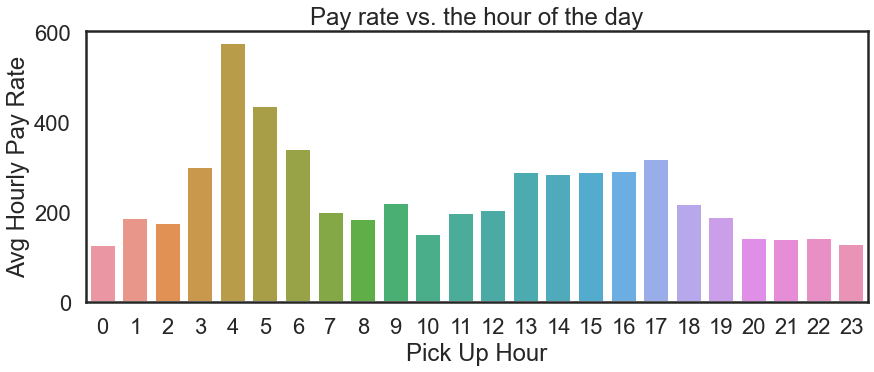

In [53]:
hourly_pay = df_AirPU_mod.groupby(['PU_hour'])['pay_rate'].mean()
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hourly_pay.index, hourly_pay, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Hourly Pay Rate')
_ = ax.set_title('Pay rate vs. the hour of the day')

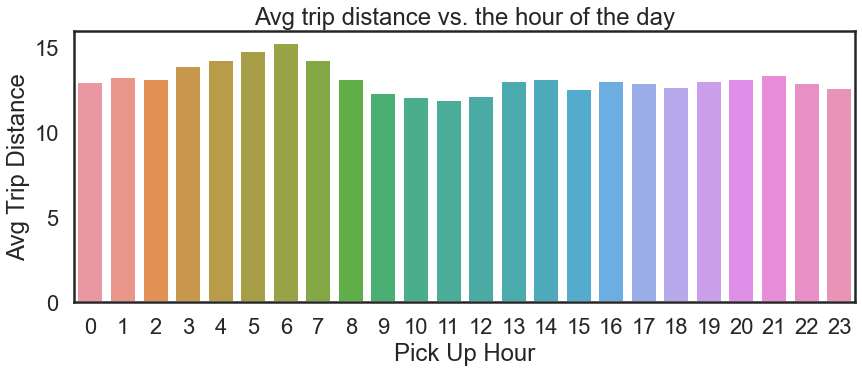

In [54]:
hourly_trip_distance = df_AirPU_mod.groupby(['PU_hour'])['trip_distance'].mean()
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hourly_trip_distance.index, hourly_trip_distance, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Trip Distance')
_ = ax.set_title('Avg trip distance vs. the hour of the day')

**Now We Calculate the pay per unit distance traveled.**

In [55]:
df_AirPU_mod['pay_per_unit_dist'] = df_AirPU_mod.pay_rate/df_AirPU_mod.trip_distance
df_AirPU_mod.head()

<ipython-input-55-d2f1435a1417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AirPU_mod['pay_per_unit_dist'] = df_AirPU_mod.pay_rate/df_AirPU_mod.trip_distance


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tip_amount,trip_time,drivers_pay,pay_rate,PU_hour,pay_per_unit_dist
23,2019-01-01 00:19:55,2019-01-01 00:57:56,12.30,38.0,4.00,2281.0,42.00,66.286716,0,5.389164
33,2019-01-01 00:08:20,2019-01-01 00:41:51,19.13,52.0,11.71,2011.0,63.71,114.050721,0,5.961878
68,2019-01-01 00:35:25,2019-01-01 01:14:21,18.15,52.0,11.71,2336.0,63.71,98.183219,0,5.409544
70,2019-01-01 00:04:06,2019-01-01 00:38:55,18.10,52.0,5.00,2089.0,57.00,98.228818,0,5.427006
112,2018-12-31 17:22:55,2019-01-01 16:57:23,22.59,60.0,7.00,84868.0,67.00,2.842061,17,0.125811


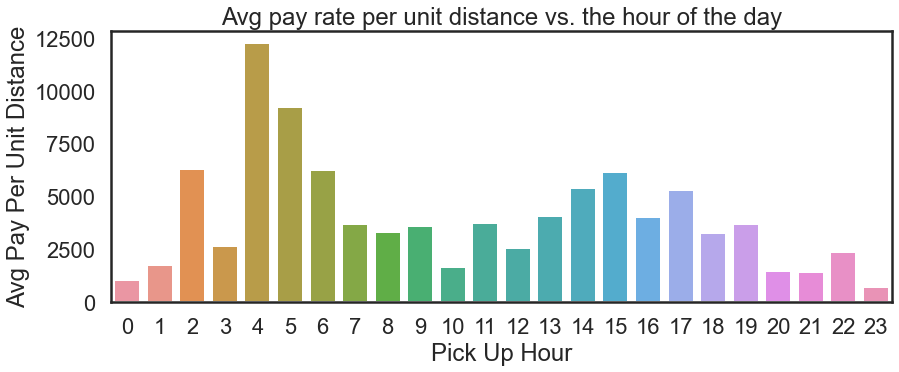

In [57]:
pay_per_dist = df_AirPU_mod.groupby(['PU_hour'])['pay_per_unit_dist'].mean()
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(pay_per_dist.index, pay_per_dist, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('Avg Pay Per Unit Distance')
_ = ax.set_title('Avg pay rate per unit distance vs. the hour of the day')

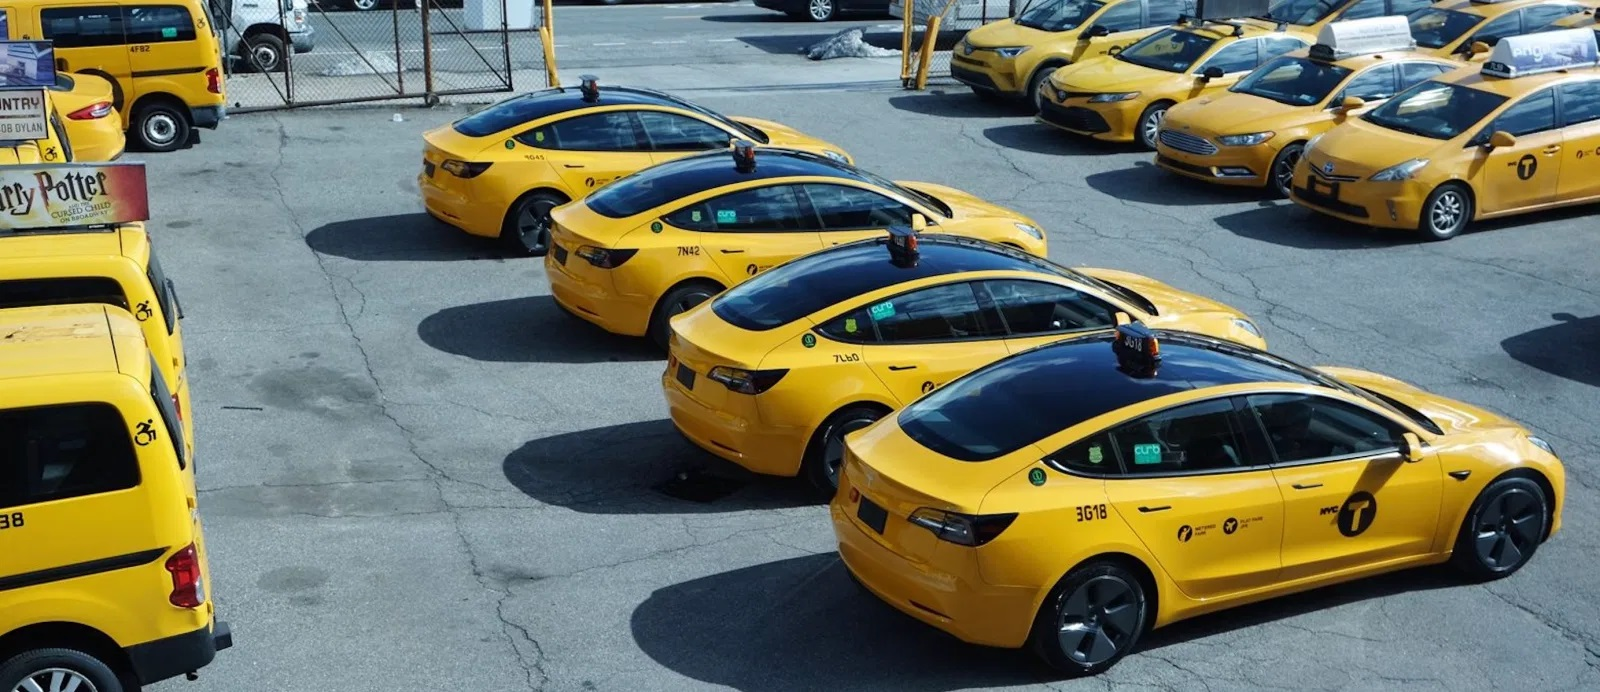

In [7]:
Image(filename="C:\Data Incubator\Project\one2.jpg") #Image source: https://electrek.co/2021/04/02/tesla-model-3-becomes-more-popular-nyc-yellow-cab/

## Predictive Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [63]:
def hourly_correlation(X_hour):
    X = X_hour[['trip_distance','trip_time']]
    Y = X_hour[['drivers_pay']]
    
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)
    
    regr = LinearRegression()
    regr.fit(X_train,Y_train)
    
    Y_hat = regr.predict(X_test)
    
    return mean_squared_error(Y_test, Y_hat),r2_score(Y_test, Y_hat)

In [64]:
mse_list = []
r2_list = []
hour = []

for i in range(24):
    X_hour = df_AirPU_mod[df_AirPU_mod.PU_hour == i]
    mse,r2 = hourly_correlation(X_hour)
    
    mse_list.append(mse)
    r2_list.append(r2)
    hour.append(i)

## Analysis of the hourly Mean Squared Error

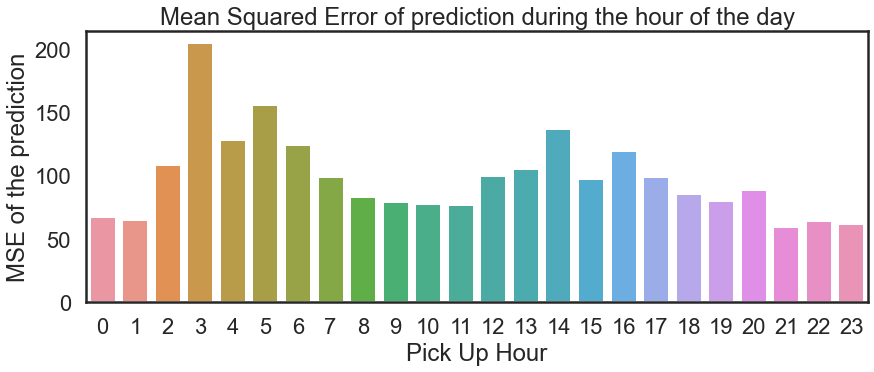

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , mse_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('MSE of the prediction')
_ = ax.set_title('Mean Squared Error of prediction during the hour of the day')

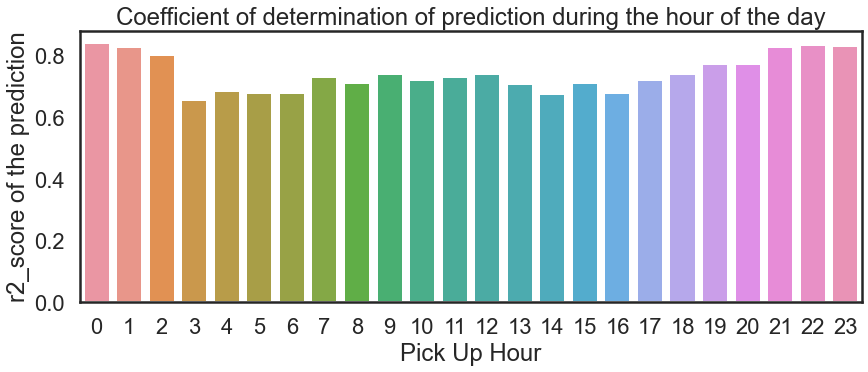

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
_ = sns.barplot(hour , r2_list, ax = ax)
ax.set_xlabel('Pick Up Hour')
ax.set_ylabel('r2_score of the prediction')
_ = ax.set_title('Coefficient of determination of prediction during the hour of the day')

**The r2_score has almost uniform distribution when only the ariport pick ups are considered**

# The End!